<a href="https://colab.research.google.com/github/IlhamThrq/AI_TI-1B_2025/blob/main/SVM%20DAN%20NA%C3%8FVE%20BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 9: SVM DAN NAÏVE BAYES

## A. LATIHAN

### 1. Percobaan 1 Implementasi Support Vector Machine (SVM)


In [ ]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Membaca dataset diabetes
df = pd.read_csv('diabetes.csv')

# Melihat 5 baris pertama
print(df.head())

# Menampilkan info dataset
print(df.info())

# Memisahkan atribut dan label
X = df[df.columns[:8]]
y = df['Outcome']

# Standarisasi data
sc = StandardScaler()
X = sc.fit_transform(X)

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Membuat model SVM dan melatih
clf = SVC()
clf.fit(X_train, y_train)

# Evaluasi akurasi
print("Akurasi SVM:", clf.score(X_test, y_test))


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

### 2. Percobaan 2: Implementasi Support Vector Regression (SVR)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


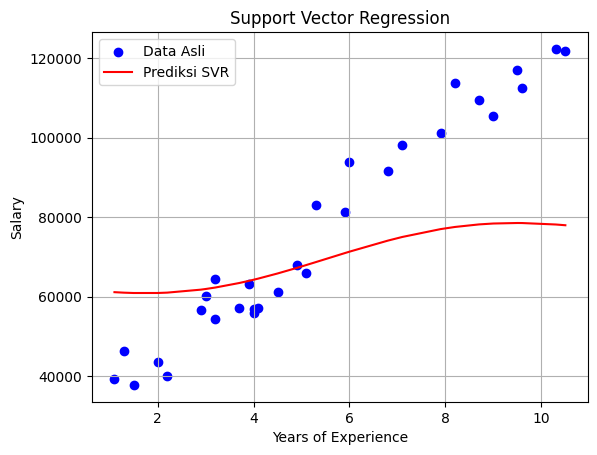

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Membaca dataset gaji
data = pd.read_csv('Salary_Data.csv')

# Menampilkan 5 baris pertama
print(data.head())

# Mengecek info data
print(data.info())

# Memisahkan atribut dan label
X = data['YearsExperience'].values[:, np.newaxis]
y = data['Salary'].values

# Membuat model SVR dan melatih
model = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(X, y)

# Visualisasi hasil regresi
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model.predict(X), color='red', label='Prediksi SVR')
plt.title('Support Vector Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


### 3. Percobaan 3: Implementasi Naïve Bayes

         ID Jenis_Kelamin  Umur        Gaji  Transaksi
0  15624510          Pria    19   285000000          0
1  15810944          Pria    35   300000000          0
2  15668575        Wanita    26   645000000          0
3  15603246        Wanita    27   855000000          0
4  15804002          Pria    19  1140000000          0
Akurasi Naïve Bayes: 87.50%
Confusion Matrix:
 [[52  4]
 [ 6 18]]


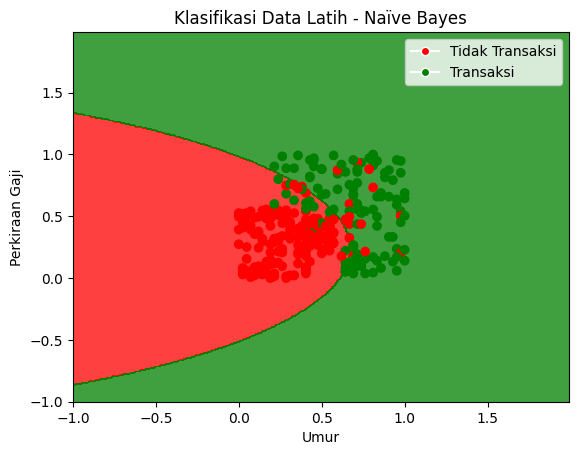

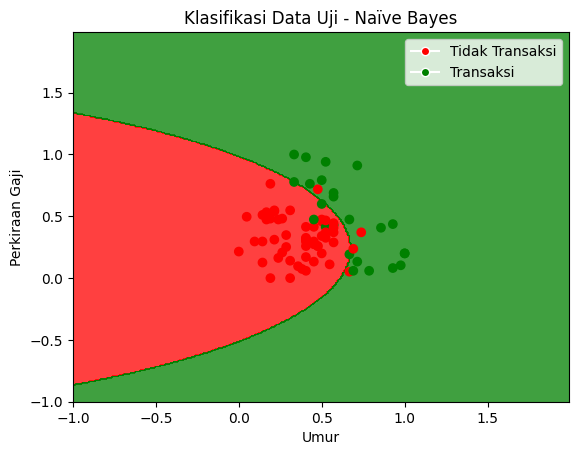

In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Membaca dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')

# Menampilkan 5 baris pertama
print(dataset.head())

# Memisahkan fitur dan label
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

# Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Normalisasi fitur
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Melatih model Naïve Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi Naïve Bayes: {:.2f}%".format(acc * 100))
print("Confusion Matrix:\n", cm)

# Visualisasi Data Latih
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                                   stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1,
                                   stop=X_set[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2,
                 classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))

    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))
    plt.title(title)
    plt.xlabel('Umur')
    plt.ylabel('Perkiraan Gaji')
    plt.legend(handles=[
        plt.Line2D([], [], marker='o', color='w', label='Tidak Transaksi', markerfacecolor='red'),
        plt.Line2D([], [], marker='o', color='w', label='Transaksi', markerfacecolor='green')
    ])
    plt.show()

# Visualisasi training dan testing
plot_decision_boundary(X_train, y_train, 'Klasifikasi Data Latih - Naïve Bayes')
plot_decision_boundary(X_test, y_test, 'Klasifikasi Data Uji - Naïve Bayes')


## B. TUGAS PRAKTIKUM


### 1. Optimasi Parameter SVM dan SVR menggunakan Grid Search

#### a. Support Vector Machine (SVM) – Klasifikasi Diabetes

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameter terbaik untuk SVM: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Akurasi terbaik (cross-validation): 0.7781648581762802
Akurasi pada data testing: 0.7559055118110236


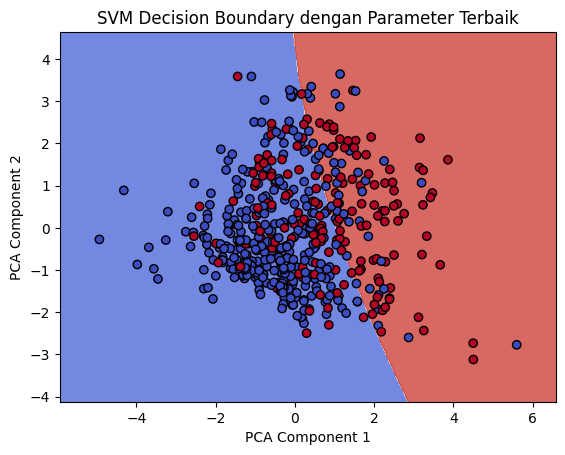

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

X = df[df.columns[:8]]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [2, 3]  # Hanya untuk kernel 'poly'
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Parameter terbaik untuk SVM:", grid_search.best_params_)
print("Akurasi terbaik (cross-validation):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Akurasi pada data testing:", test_accuracy)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

best_model.fit(X_train_pca, y_train)

h = .02  # Ukuran langkah pada mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary dengan Parameter Terbaik')
plt.show()

#### b. Support Vector Regression (SVR) – Prediksi Gaji

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameter terbaik untuk SVR: {'C': 10000, 'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
Skor R^2 terbaik (cross-validation): 0.8992782617624057
Skor R^2 pada data testing: 0.9074971933266072


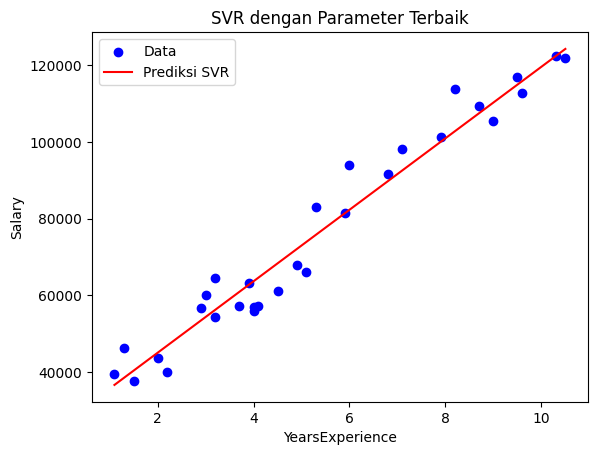

In [6]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('Salary_Data.csv')

X = data['YearsExperience'].values[:, np.newaxis]
y = data['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr = SVR()

param_grid = {
    'C': [100, 1000, 10000],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'epsilon': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Parameter terbaik untuk SVR:", grid_search.best_params_)
print("Skor R^2 terbaik (cross-validation):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print("Skor R^2 pada data testing:", test_r2)

X_original = data['YearsExperience'].values[:, np.newaxis]
plt.scatter(X_original, y, color='blue', label='Data')
plt.plot(X_original, best_model.predict(scaler.transform(X_original)), color='red', label='Prediksi SVR')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('SVR dengan Parameter Terbaik')
plt.legend()
plt.show()

### 2. Tuning Model Naïve Bayes untuk Meningkatkan Akurasi


=== HASIL TUNING NAÏVE BAYES ===
Best Parameters: {'var_smoothing': np.float64(1e-09)}
Akurasi (test set): 93.75%
Confusion Matrix:
 [[50  2]
 [ 3 25]]


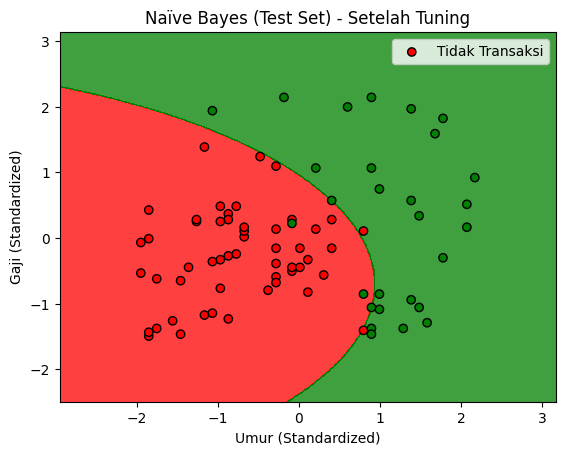

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')

X = dataset[['Umur', 'Gaji']].values
y = dataset['Transaksi'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'var_smoothing': np.logspace(-9, 0, 100)
}
grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_nb = grid.best_estimator_
y_pred = best_nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("=== HASIL TUNING NAÏVE BAYES ===")
print("Best Parameters:", grid.best_params_)
print("Akurasi (test set): {:.2f}%".format(acc * 100))
print("Confusion Matrix:\n", cm)

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
)

plt.contourf(
    X1, X2,
    best_nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.scatter(
    X_set[:, 0], X_set[:, 1],
    c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k'
)
plt.title('Naïve Bayes (Test Set) - Setelah Tuning')
plt.xlabel('Umur (Standardized)')
plt.ylabel('Gaji (Standardized)')
plt.legend(['Tidak Transaksi', 'Transaksi'])
plt.show()
